<a href="https://colab.research.google.com/github/ShanmukhiKairuppala/Diabetic_Retinopathy_Detection/blob/main/DR_APTOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/ColabNotebooks/Kaggle_API_Credentials/kaggle.json  ~/.kaggle/kaggle.json

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.49G/9.51G [01:21<00:00, 206MB/s]
100% 9.51G/9.51G [01:22<00:00, 125MB/s]


In [7]:
!unzip aptos2019-blindness-detection.zip -d Dataset/

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/test_images/512beaada8f0.png  
  inflating: Dataset/test_images/51323e9d2070.png  
  inflating: Dataset/test_images/515675001b9e.png  
  inflating: Dataset/test_images/515877da2def.png  
  inflating: Dataset/test_images/5168ddccea88.png  
  inflating: Dataset/test_images/5172c056a687.png  
  inflating: Dataset/test_images/5177461f5339.png  
  inflating: Dataset/test_images/51910bcb980d.png  
  inflating: Dataset/test_images/51a3e9b6a1c0.png  
  inflating: Dataset/test_images/51bbd82feec8.png  
  inflating: Dataset/test_images/51de5fb8eccd.png  
  inflating: Dataset/test_images/51e88694c81f.png  
  inflating: Dataset/test_images/51f0bf8f1544.png  
  inflating: Dataset/test_images/51f57fb32840.png  
  inflating: Dataset/test_images/51fa42dc1415.png  
  inflating: Dataset/test_images/5276ab33b7b0.png  
  inflating: Dataset/test_images/52a353760f72.png  
  inflating: Dataset/test_images/531937254e73.png  
  inflating: 

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


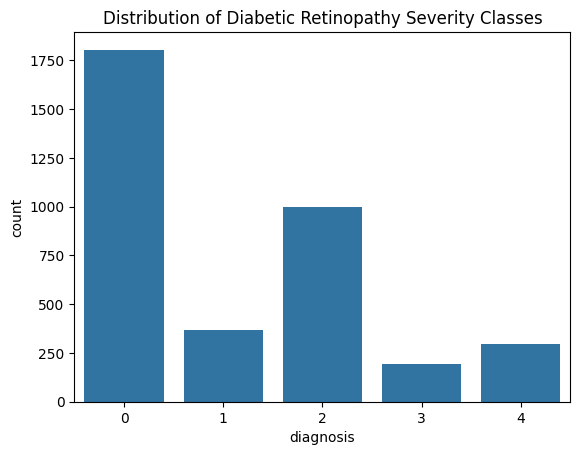

In [8]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training labels
train_labels = pd.read_csv('/content/Dataset/train.csv')

# Display the first few rows of the training labels
print(train_labels.head())

# Plot the distribution of classes
sns.countplot(x='diagnosis', data=train_labels)
plt.title('Distribution of Diabetic Retinopathy Severity Classes')
plt.show()


In [ ]:
'''
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the training labels
train_labels = pd.read_csv('/content/Dataset/train.csv')

# Set the path to the folder containing the images
image_folder = '/content/Dataset/train_images/'

# Function to preprocess images
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, target_size)  # Resize
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

# Preprocess all images and store in a list
processed_images = []

for image_id in train_labels['id_code']:
    image_path = os.path.join(image_folder, f'{image_id}.png')
    processed_image = preprocess_image(image_path)
    processed_images.append(processed_image)

# Convert the list to a NumPy array
X = np.array(processed_images)

# Assign labels
y = train_labels['diagnosis'].values

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the data arrays
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")
'''

'\nimport os\nimport cv2\nimport numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\n\n# Load the training labels\ntrain_labels = pd.read_csv(\'/content/Dataset/train.csv\')\n\n# Set the path to the folder containing the images\nimage_folder = \'/content/Dataset/train_images/\'\n\n# Function to preprocess images\ndef preprocess_image(image_path, target_size=(224, 224)):\n    img = cv2.imread(image_path)\n    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB\n    img = cv2.resize(img, target_size)  # Resize\n    img = img / 255.0  # Normalize pixel values to [0, 1]\n    return img\n\n# Preprocess all images and store in a list\nprocessed_images = []\n\nfor image_id in train_labels[\'id_code\']:\n    image_path = os.path.join(image_folder, f\'{image_id}.png\')\n    processed_image = preprocess_image(image_path)\n    processed_images.append(processed_image)\n\n# Convert the list to a NumPy array\nX = np.array(processed_images)\n\n# Assign lab

In [ ]:
'''  --------------1/4/24
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load a smaller sample of the training labels
train_labels = pd.read_csv('/content/Dataset/train.csv').sample(frac=0.1, random_state=42)

# Set the path to the folder containing the images
image_folder = '/content/Dataset/train_images/'

# Function to preprocess images
def preprocess_image(image_path, target_size=(64, 64)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, target_size)  # Resize
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

# Preprocess all images in parallel and store in a list
from joblib import Parallel, delayed

processed_images = Parallel(n_jobs=-1)(delayed(preprocess_image)(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'])

# Convert the list to a NumPy array
X = np.array(processed_images)

# Assign labels
y = train_labels['diagnosis'].values

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the data arrays
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")
'''

X_train shape: (292, 64, 64, 3), y_train shape: (292,)
X_valid shape: (74, 64, 64, 3), y_valid shape: (74,)


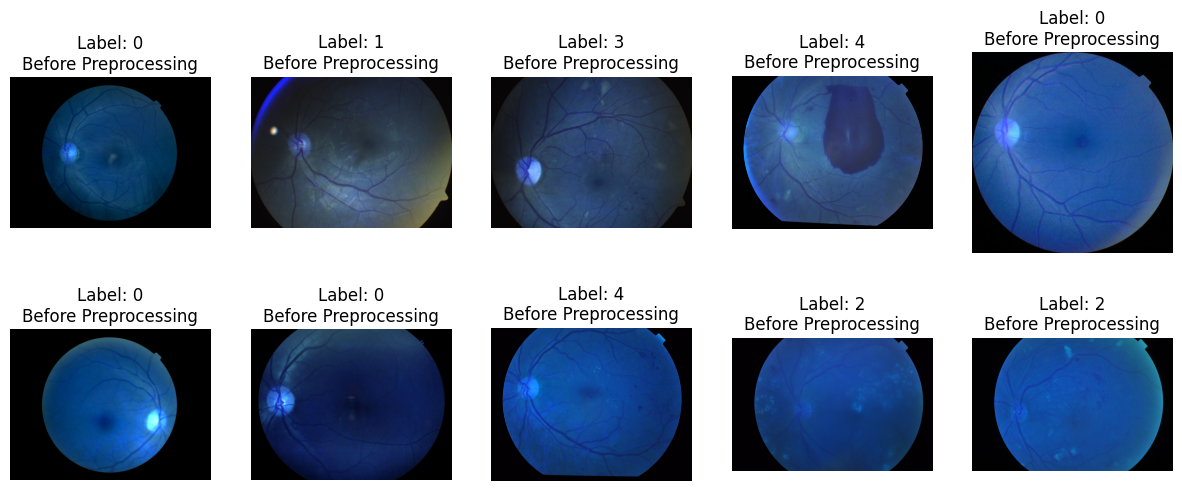

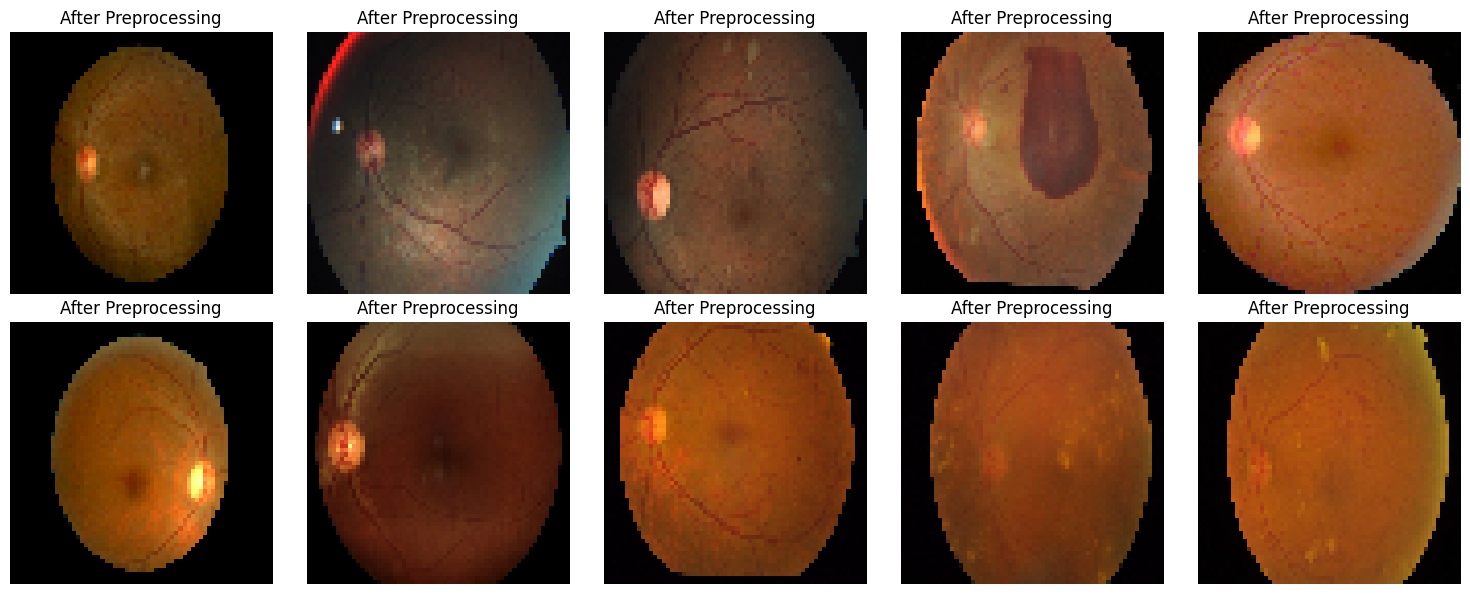

In [ ]:
'''
# Function to display images before and after preprocessing
def display_images_before_after(images, processed_images, labels, rows=2, cols=5):
    fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
    axs = axs.ravel()

    for i in range(rows * cols):
        axs[i].imshow(images[i])
        axs[i].set_title(f"Label: {labels.iloc[i]}\nBefore Preprocessing")
        axs[i].axis('off')

    fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
    axs = axs.ravel()

    for i in range(rows * cols):
        axs[i].imshow(processed_images[i])
        axs[i].set_title(f"After Preprocessing")
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Display a set of 10 images before and after preprocessing
sample_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Ensure that the dataset has at least 10 samples
if len(train_labels) >= 10:
    sample_images = [cv2.imread(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'].iloc[sample_indices]]
    sample_processed_images = [preprocess_image(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'].iloc[sample_indices]]
    sample_labels = train_labels['diagnosis'].iloc[sample_indices]

    display_images_before_after(sample_images, sample_processed_images, sample_labels)
else:
    print("Dataset has fewer than 10 samples. Please adjust the sample_indices.")
    '''

In [ ]:
'''
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from joblib import Parallel, delayed

# Load a smaller sample of the training labels
train_labels = pd.read_csv('/content/Dataset/train.csv').sample(frac=0.1, random_state=42)

# Set the path to the folder containing the images
image_folder = '/content/Dataset/train_images/'

# Function to preprocess images
def preprocess_image(image_path, target_size=(64, 64)):
    # Read and resize the original image
    original_image = cv2.imread(image_path)
    resized_image = cv2.resize(original_image, target_size)

    # Normalize pixel values
    normalized_image = resized_image / 255.0

    # Convert normalized image back to np.uint8
    normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

    # Apply Gaussian blur for noise reduction
    blurred_image = cv2.GaussianBlur(normalized_image_uint8, (5, 5), 0)

    # Canny edge detection
    edges = cv2.Canny(blurred_image, 30, 50)

    return edges

# Preprocess all images in parallel and store in a list
processed_images = Parallel(n_jobs=-1)(delayed(preprocess_image)(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'])

# Convert the list to a NumPy array
X = np.array(processed_images)

# Assign labels
y = train_labels['diagnosis'].values

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the data arrays
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")
'''

X_train shape: (292, 64, 64), y_train shape: (292,)
X_valid shape: (74, 64, 64), y_valid shape: (74,)


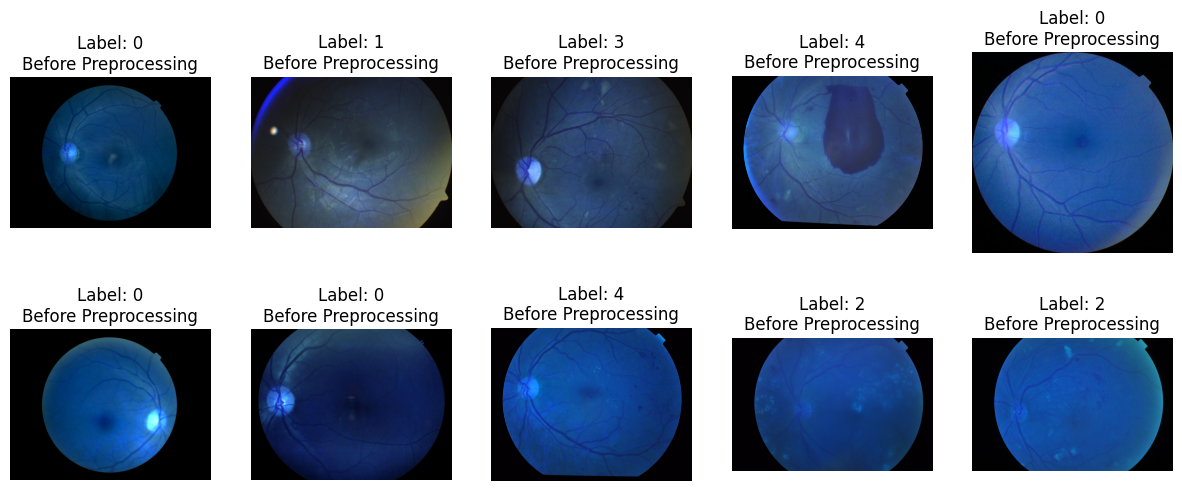

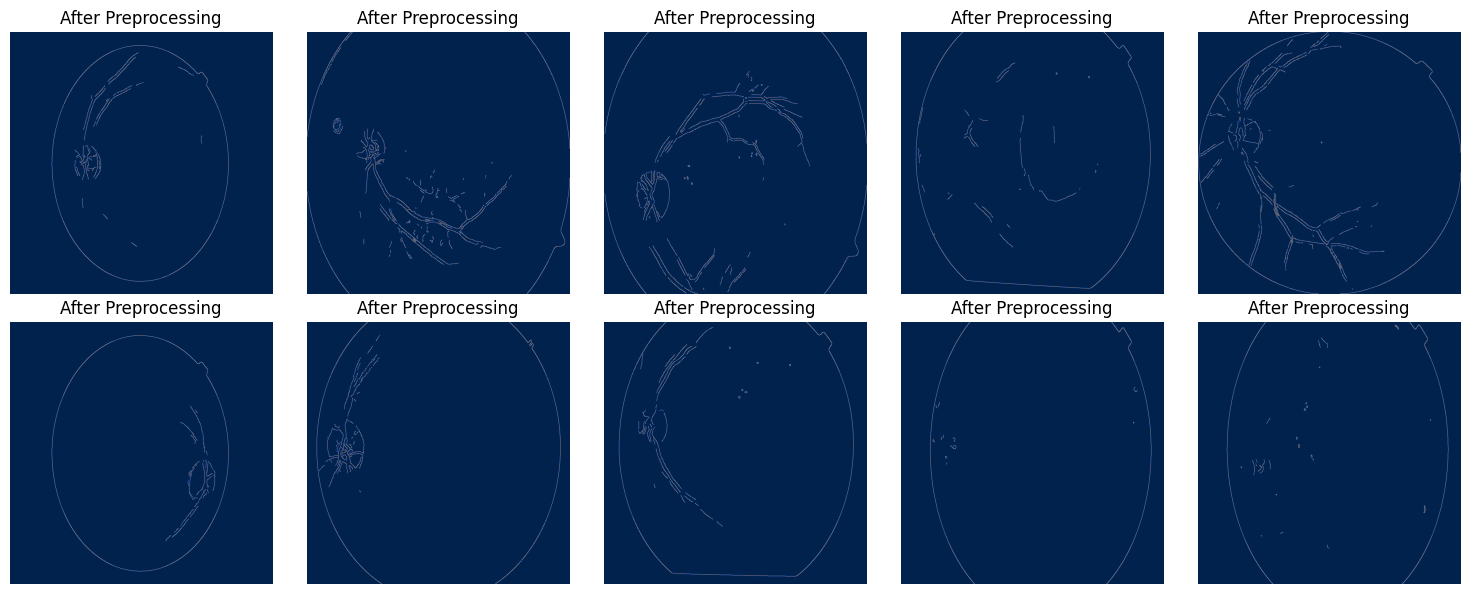

In [ ]:
'''

# Function to display images before and after preprocessing
def display_images_before_after(images, processed_images, labels, rows=2, cols=5):
    fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
    axs = axs.ravel()

    for i in range(rows * cols):
        axs[i].imshow(images[i], cmap='viridis')  # Original images with 'viridis' colormap
        axs[i].set_title(f"Label: {labels.iloc[i]}\nBefore Preprocessing")
        axs[i].axis('off')

    fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
    axs = axs.ravel()

    for i in range(rows * cols):
        axs[i].imshow(processed_images[i], cmap='cividis')  # Preprocessed images with 'cividis' colormap
        axs[i].set_title(f"After Preprocessing")
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Display a set of 10 images before and after preprocessing
sample_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Ensure that the dataset has at least 10 samples
if len(train_labels) >= 10:
    sample_images = [cv2.imread(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'].iloc[sample_indices]]
    sample_processed_images = [preprocess_image(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'].iloc[sample_indices]]
    sample_labels = train_labels['diagnosis'].iloc[sample_indices]

    display_images_before_after(sample_images, sample_processed_images, sample_labels)
else:
    print("Dataset has fewer than 10 samples. Please adjust the sample_indices.")


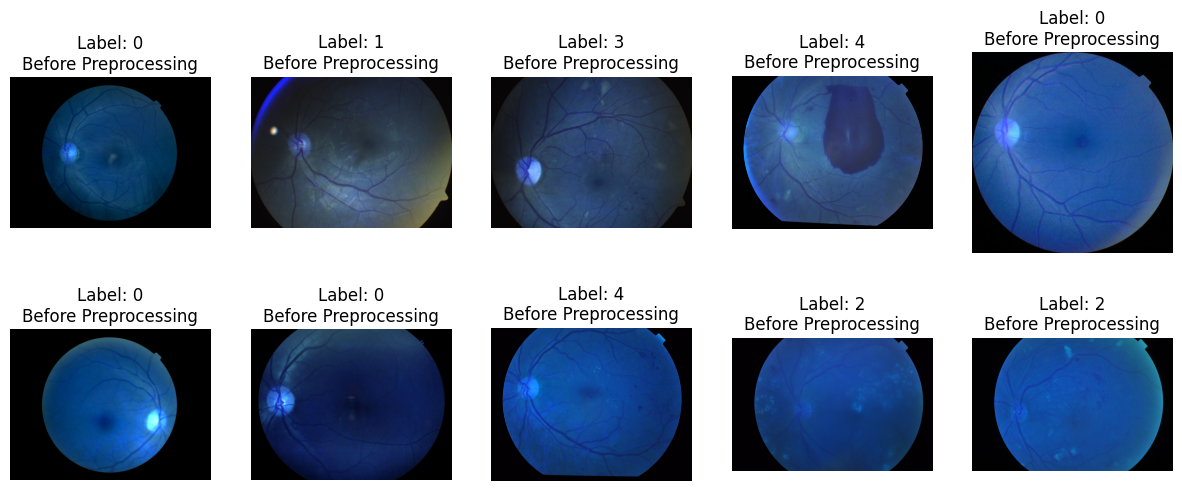

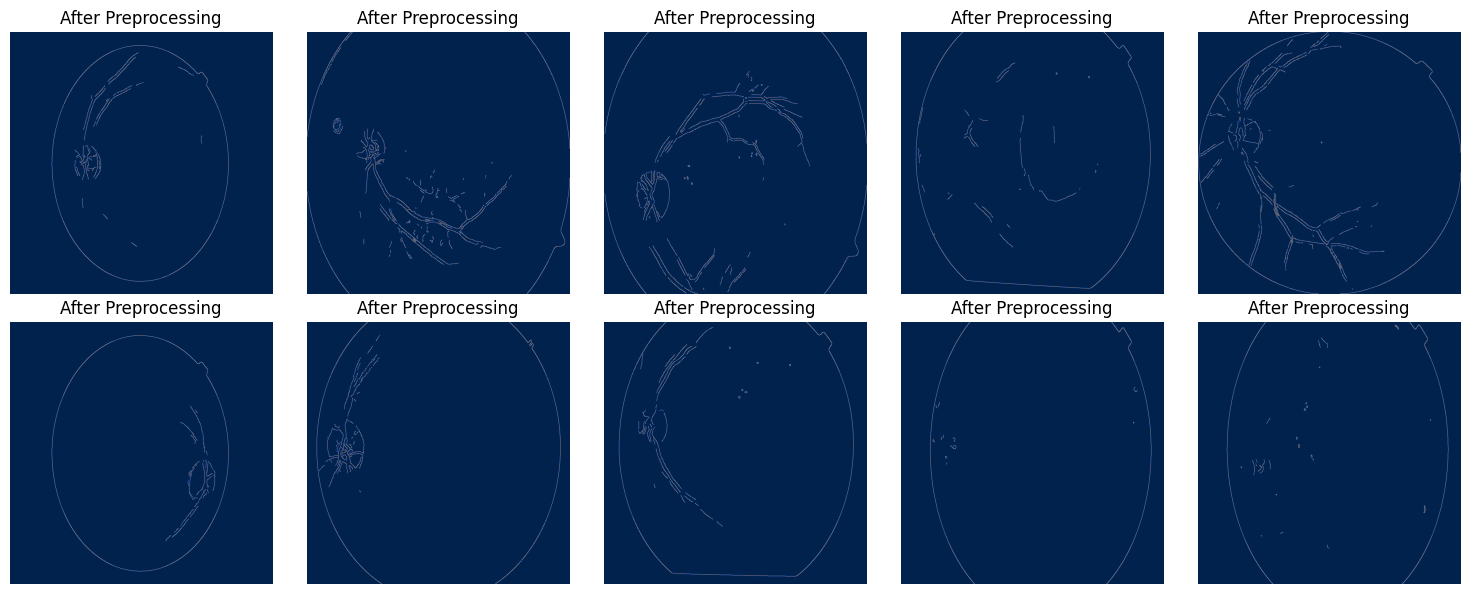

In [ ]:
'''

# Function to display images before and after preprocessing
def display_images_before_after(images, processed_images, labels, rows=2, cols=5):
    fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
    axs = axs.ravel()

    for i in range(rows * cols):
        axs[i].imshow(images[i], cmap='gray')  # Change colormap to 'gray' for original images
        axs[i].set_title(f"Label: {labels.iloc[i]}\nBefore Preprocessing")
        axs[i].axis('off')

    fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
    axs = axs.ravel()

    for i in range(rows * cols):
        axs[i].imshow(processed_images[i], cmap='cividis')  # Use 'cividis' colormap for processed images
        axs[i].set_title(f"After Preprocessing")
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Display a set of 10 images before and after preprocessing
sample_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Ensure that the dataset has at least 10 samples
if len(train_labels) >= 10:
    sample_images = [cv2.imread(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'].iloc[sample_indices]]
    sample_processed_images = [preprocess_image(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'].iloc[sample_indices]]
    sample_labels = train_labels['diagnosis'].iloc[sample_indices]

    display_images_before_after(sample_images, sample_processed_images, sample_labels)
else:
    print("Dataset has fewer than 10 samples. Please adjust the sample_indices.")


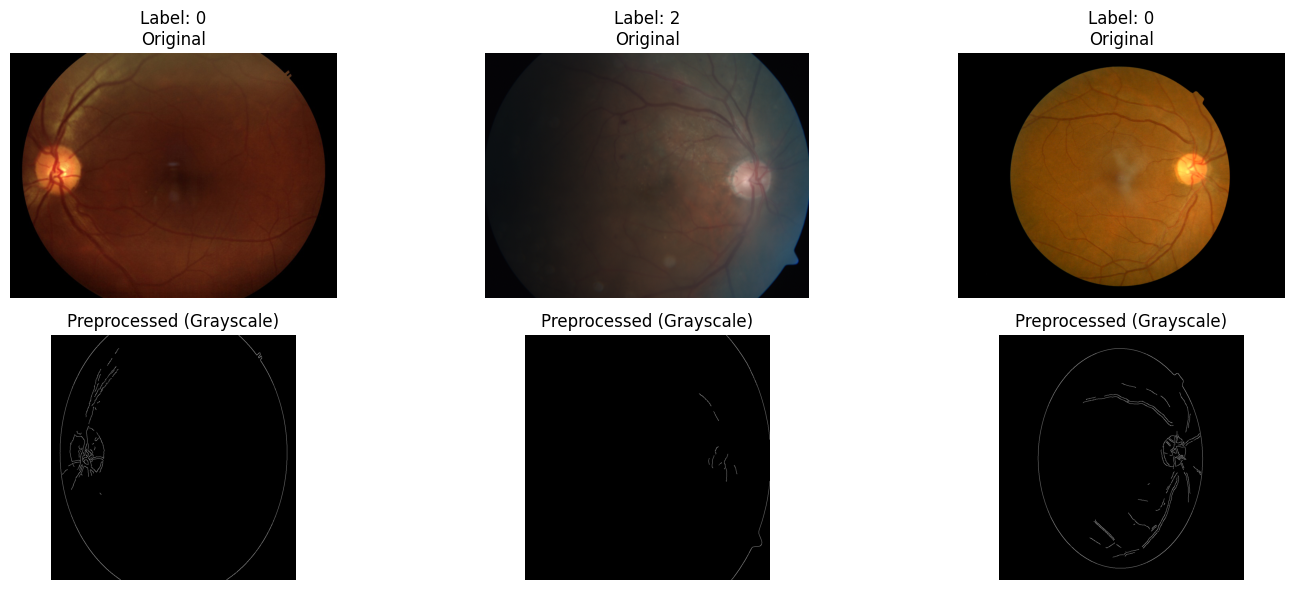

In [ ]:
'''
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load a smaller sample of the training labels
train_labels = pd.read_csv('/content/Dataset/train.csv').sample(frac=0.1, random_state=42)

# Set the path to the folder containing the images
image_folder = '/content/Dataset/train_images/'

# Function to preprocess images
def preprocess_image(image_path, target_size=(1000, 1000)):
    # Read and resize the original image
    original_image = cv2.imread(image_path)
    resized_image = cv2.resize(original_image, target_size)

    # Convert to grayscale
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur for noise reduction
    blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

    # Canny edge detection
    edges = cv2.Canny(blurred_image, 30, 50)

    return edges

# Display a set of 3 images before and after preprocessing
sample_indices = [6, 14, 20]  # Adjust the indices here

# Ensure that the dataset has at least 3 samples
if len(train_labels) >= 3:
    sample_images = [cv2.imread(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'].iloc[sample_indices]]
    sample_original_images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in sample_images]
    sample_processed_images = [preprocess_image(os.path.join(image_folder, f'{image_id}.png')) for image_id in train_labels['id_code'].iloc[sample_indices]]
    sample_labels = train_labels['diagnosis'].iloc[sample_indices]

    # Display original and preprocessed images
    fig, axs = plt.subplots(2, len(sample_indices), figsize=(15, 6))
    for i in range(len(sample_indices)):
        axs[0, i].imshow(sample_original_images[i])
        axs[0, i].set_title(f"Label: {sample_labels.iloc[i]}\nOriginal")
        axs[0, i].axis('off')

        axs[1, i].imshow(sample_processed_images[i], cmap='gray')
        axs[1, i].set_title("Preprocessed (Grayscale)")
        axs[1, i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Dataset has fewer than 3 samples. Please adjust the sample_indices.")


Images copied successfully.


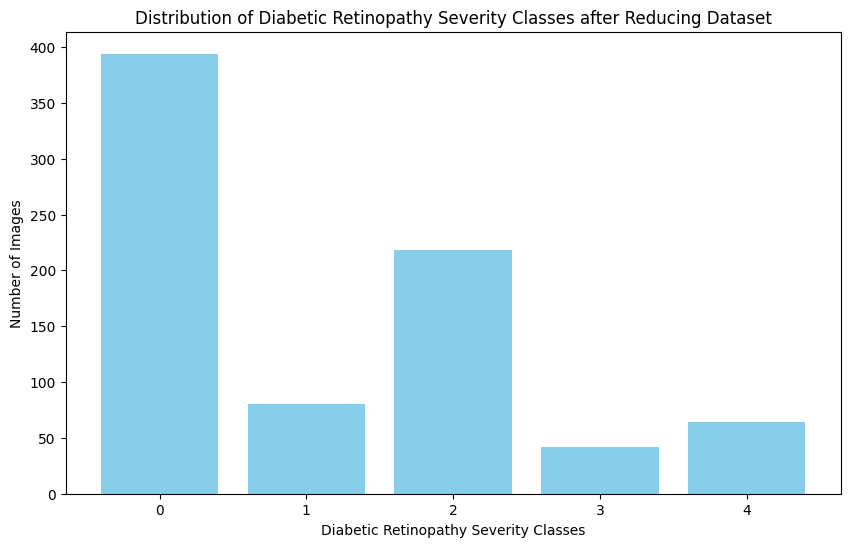

In [13]:


import random
import shutil

# Desired total number of images
total_images = 800

# Calculate the original distribution of DR levels
original_distribution = train_labels['diagnosis'].value_counts().to_dict()

# Calculate the proportion of each DR level
total_original_images = sum(original_distribution.values())
proportions = {level: count / total_original_images for level, count in original_distribution.items()}

# Calculate the number of images to select for each DR level
selected_counts = {level: int(proportions[level] * total_images) for level in proportions}

# Filter images based on selected counts
selected_images = {}
for level, count in selected_counts.items():
    images_of_level = train_labels[train_labels['diagnosis'] == level]['id_code'].tolist()
    selected_images[level] = random.sample(images_of_level, count)

# Create a new directory for the reduced dataset
reduced_dataset_directory = "/content/Reduced_Dataset"
os.makedirs(reduced_dataset_directory, exist_ok=True)

# Copy selected images to the new directory
for level, images in selected_images.items():
    level_directory = os.path.join(reduced_dataset_directory, f"DR_{level}")
    os.makedirs(level_directory, exist_ok=True)
    for image_id in images:
        source_path = os.path.join("/content/Dataset/train_images", f"{image_id}.png")  # Assuming images are in train_images folder
        target_path = os.path.join(level_directory, f"{image_id}.png")
        shutil.copyfile(source_path, target_path)

print("Images copied successfully.")

# Plot the distribution of DR levels after reducing the dataset
plt.figure(figsize=(10, 6))
plt.bar(selected_counts.keys(), selected_counts.values(), color='skyblue')
plt.xlabel('Diabetic Retinopathy Severity Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Diabetic Retinopathy Severity Classes after Reducing Dataset')
plt.show()


In [24]:
import shutil

# Path to the folder to be deleted
folder_to_delete = "/content/Reduced_Dataset"

# Delete the folder and its contents
shutil.rmtree(folder_to_delete)

print(f"The folder '{folder_to_delete}' and its contents have been deleted.")


The folder '/content/Reduced_Dataset' and its contents have been deleted.


In [17]:
'''
import os
import cv2
import numpy as np
import pandas as pd
import random
import shutil
import matplotlib.pyplot as plt

# Function to preprocess images
def preprocess_image(image_path, target_size=(1000, 1000)):
    # Read and resize the original image
    original_image = cv2.imread(image_path)
    resized_image = cv2.resize(original_image, target_size)

    # Convert to grayscale
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur for noise reduction
    blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

    # Canny edge detection
    edges = cv2.Canny(blurred_image, 30, 50)

    return edges

# Function to create reduced dataset with 700-800 images evenly distributed across DR levels
def create_reduced_dataset(original_dataset_directory, reduced_dataset_directory):
    # Load original dataset information
    train_labels = pd.read_csv(os.path.join(original_dataset_directory, "train.csv"))

    # Group images by DR level
    grouped_images = train_labels.groupby('diagnosis')['id_code'].apply(list)

    # Calculate the number of images needed from each DR level
    total_images = random.randint(700, 800)
    images_per_level = {level: min(len(images), round(total_images / len(grouped_images))) for level, images in grouped_images.items()}

    # Create reduced dataset directory
    os.makedirs(reduced_dataset_directory, exist_ok=True)

    # Copy images to reduced dataset
    for level, images in grouped_images.items():
        images_to_copy = random.sample(images, min(images_per_level[level], len(images)))
        level_directory = os.path.join(reduced_dataset_directory, f"DR_{level}")
        os.makedirs(level_directory, exist_ok=True)
        for image in images_to_copy:
            source_path = os.path.join(original_dataset_directory, "train_images", f"{image}.png")
            target_path = os.path.join(level_directory, f"{image}.png")
            shutil.copyfile(source_path, target_path)

    # Create CSV file containing image IDs and their corresponding DR levels
    reduced_dataset_csv = os.path.join(reduced_dataset_directory, "reduced_dataset.csv")
    reduced_labels = train_labels[train_labels['id_code'].isin([f'{image}.png' for level in grouped_images.keys() for image in random.sample(grouped_images[level], min(images_per_level[level], len(grouped_images[level])))])]
    reduced_labels.to_csv(reduced_dataset_csv, index=False)

    print("Reduced dataset created successfully.")

    if os.path.exists(reduced_dataset_csv):
        print(f"CSV file created at {reduced_dataset_csv}")
        # Plot the distribution of DR levels in the reduced dataset
        plot_distribution(reduced_dataset_csv)
    else:
        print("CSV file not found. Please check the file path.")

# Function to plot distribution of DR levels
def plot_distribution(reduced_dataset_csv):
    reduced_labels = pd.read_csv(reduced_dataset_csv)
    if not reduced_labels.empty:
        plt.figure(figsize=(10, 6))
        reduced_labels['diagnosis'].value_counts().sort_index().plot(kind='bar', color='skyblue')
        plt.xlabel('Diabetic Retinopathy Severity Classes')
        plt.ylabel('Number of Images')
        plt.title('Distribution of Diabetic Retinopathy Severity Classes in Reduced Dataset')
        plt.xticks(rotation=0)
        plt.show()
    else:
        print("The reduced dataset is empty.")

# Path to the original dataset directory
original_dataset_directory = "/content/Dataset"

# Path to the reduced dataset directory
reduced_dataset_directory = "/content/Reduced_Dataset"

# Create reduced dataset with 700-800 images evenly distributed across DR levels
create_reduced_dataset(original_dataset_directory, reduced_dataset_directory)

# Perform image processing on reduced dataset
reduced_dataset_csv = os.path.join(reduced_dataset_directory, "reduced_dataset.csv")
if os.path.exists(reduced_dataset_csv):
    reduced_labels = pd.read_csv(reduced_dataset_csv)
    if not reduced_labels.empty:
        sample_indices = random.sample(range(len(reduced_labels)), min(3, len(reduced_labels)))
        if len(sample_indices) > 0:
            plt.figure(figsize=(15, 6))
            for i, idx in enumerate(sample_indices):
                image_id = reduced_labels.iloc[idx]['id_code'][:-4]  # Remove '.png' extension
                image_path = os.path.join(reduced_dataset_directory, f"DR_{reduced_labels.iloc[idx]['diagnosis']}", f"{image_id}.png")

                # Preprocess image
                preprocessed_image = preprocess_image(image_path)

                # Display preprocessed image
                plt.subplot(1, 3, i+1)
                plt.imshow(preprocessed_image, cmap='gray')
                plt.title(f"DR Level: {reduced_labels.iloc[idx]['diagnosis']}")
                plt.axis('off')
            plt.tight_layout()
            plt.show()
        else:
            print("No images found in the reduced dataset.")
    else:
        print("The reduced dataset is empty.")
else:
    print("CSV file not found. Please check the file path.")
    '''


Reduced dataset created successfully.
CSV file created at /content/Reduced_Dataset/reduced_dataset.csv
The reduced dataset is empty.
The reduced dataset is empty.


In [19]:
import os
import random
import shutil
import pandas as pd

# Paths from provided code
csv_file_path = '/content/Dataset/train.csv'
training_data_folder = '/content/Dataset/train_images'
reduced_data_folder = '/content/Reduced_Dataset'

# Define the number of images to keep
num_images_to_keep = 800

# Read the CSV file
train_labels = pd.read_csv(csv_file_path)

# Sample the images to keep
image_ids_to_keep = random.sample(train_labels['id_code'].tolist(), num_images_to_keep)

# Copy the selected images to the reduced data folder
os.makedirs(reduced_data_folder, exist_ok=True)
for image_id in image_ids_to_keep:
    image_path = os.path.join(training_data_folder, f"{image_id}.png")
    shutil.copy(image_path, reduced_data_folder)

# Update the CSV file with the reduced data
reduced_train_labels = train_labels[train_labels['id_code'].isin(image_ids_to_keep)]
reduced_csv_file_path = os.path.join(reduced_data_folder, "reduced_train.csv")
reduced_train_labels.to_csv(reduced_csv_file_path, index=False)

print("Reduced dataset created successfully.")
print(f"CSV file created at: {reduced_csv_file_path}")


Reduced dataset created successfully.
CSV file created at: /content/Reduced_Dataset/reduced_train.csv


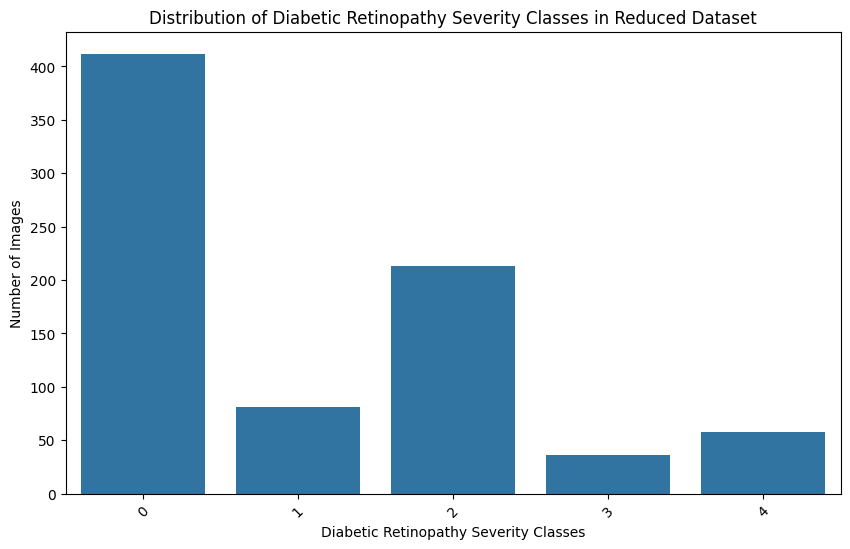

In [20]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the reduced dataset CSV file
reduced_csv_file_path = '/content/Reduced_Dataset/reduced_train.csv'

# Read the reduced dataset CSV file
reduced_train_labels = pd.read_csv(reduced_csv_file_path)

# Plot the distribution of DR levels in the reduced dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=reduced_train_labels)
plt.title('Distribution of Diabetic Retinopathy Severity Classes in Reduced Dataset')
plt.xlabel('Diabetic Retinopathy Severity Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


In [25]:
import os
import random
import shutil
import pandas as pd

# Paths from provided code
csv_file_path = '/content/Dataset/train.csv'
training_data_folder = '/content/Dataset/train_images'
reduced_data_folder = '/content/Reduced_Dataset'

# Define the number of images to keep for each DR level
num_images_per_level = {'0': 200, '1': 120, '2': 200, '3': 100 , '4': 180}

# Read the CSV file
train_labels = pd.read_csv(csv_file_path)

# Sample the images to keep for each DR level
selected_image_ids = []
for level, num_images in num_images_per_level.items():
    images_in_level = train_labels[train_labels['diagnosis'] == int(level)]
    selected_image_ids.extend(random.sample(images_in_level['id_code'].tolist(), num_images))

# Copy the selected images to the reduced data folder
os.makedirs(reduced_data_folder, exist_ok=True)
for image_id in selected_image_ids:
    image_path = os.path.join(training_data_folder, f"{image_id}.png")
    shutil.copy(image_path, reduced_data_folder)

# Update the CSV file with the reduced data
reduced_train_labels = train_labels[train_labels['id_code'].isin(selected_image_ids)]
reduced_csv_file_path = os.path.join(reduced_data_folder, "reduced_train.csv")
reduced_train_labels.to_csv(reduced_csv_file_path, index=False)

print("Reduced dataset created successfully.")
print(f"CSV file created at: {reduced_csv_file_path}")


Reduced dataset created successfully.
CSV file created at: /content/Reduced_Dataset/reduced_train.csv


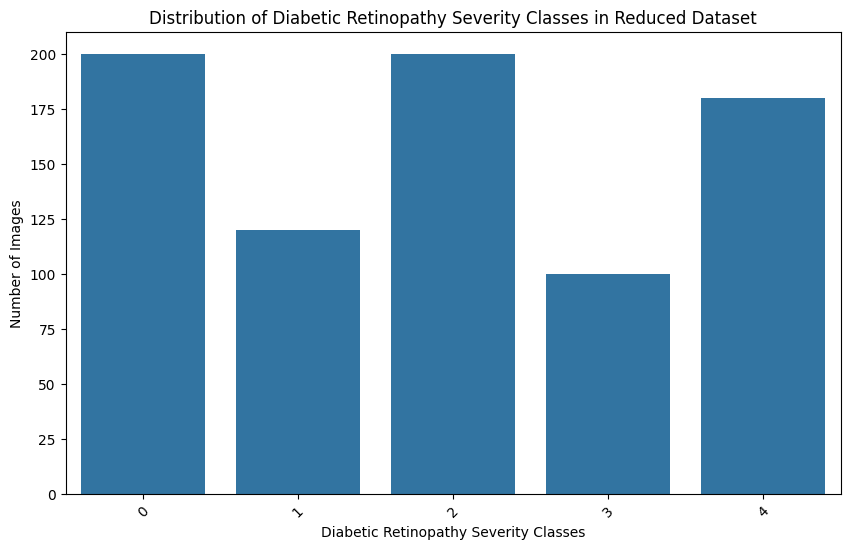

In [26]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the reduced dataset CSV file
reduced_csv_file_path = '/content/Reduced_Dataset/reduced_train.csv'

# Read the reduced dataset CSV file
reduced_train_labels = pd.read_csv(reduced_csv_file_path)

# Plot the distribution of DR levels in the reduced dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=reduced_train_labels)
plt.title('Distribution of Diabetic Retinopathy Severity Classes in Reduced Dataset')
plt.xlabel('Diabetic Retinopathy Severity Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


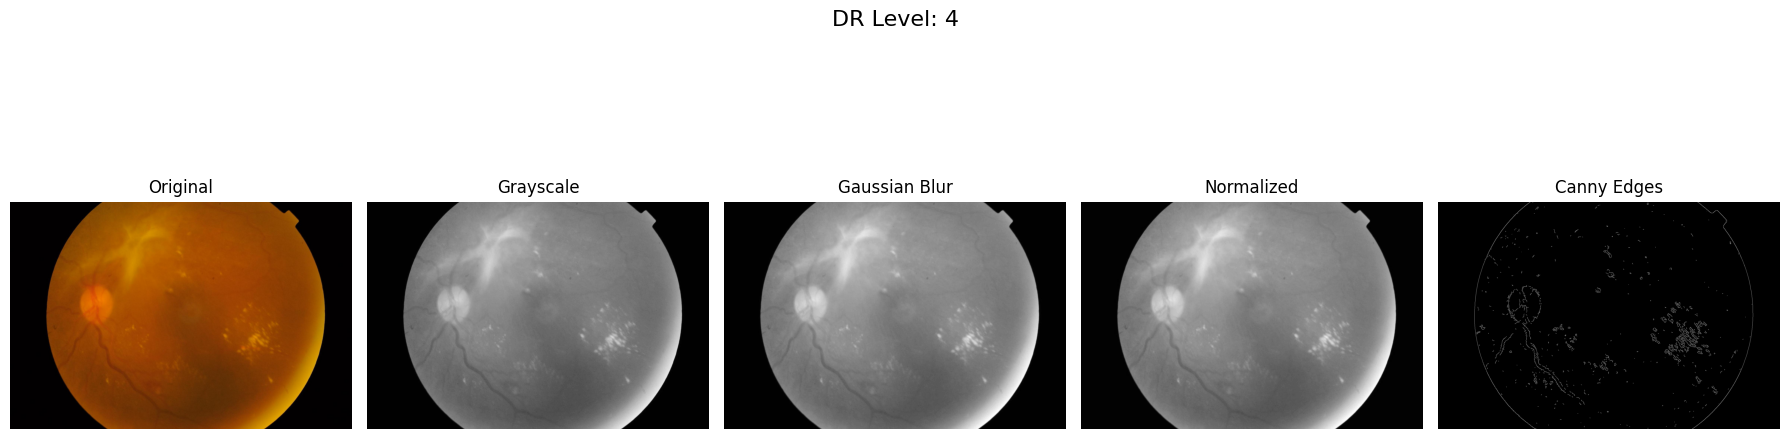

In [29]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Paths from previous code
reduced_data_folder = '/content/Reduced_Dataset'

# Function to preprocess images
def preprocess_image(image):
    # Convert to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur for noise reduction
    blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

    # Normalize the image
    normalized_image = cv2.normalize(blurred_image, None, 0, 255, cv2.NORM_MINMAX)

    # Canny edge detection
    edges = cv2.Canny(normalized_image, 30, 20)

    return grayscale_image, blurred_image, normalized_image, edges

# Function to display images
def display_images(original_image, grayscale_image, blurred_image, normalized_image, edges, level):
    plt.figure(figsize=(18, 6))
    plt.suptitle(f"DR Level: {level}", fontsize=16)

    plt.subplot(1, 5, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(blurred_image, cmap='gray')
    plt.title('Gaussian Blur')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(normalized_image, cmap='gray')
    plt.title('Normalized')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load the reduced dataset CSV file
reduced_csv_file_path = os.path.join(reduced_data_folder, "reduced_train.csv")
reduced_train_labels = pd.read_csv(reduced_csv_file_path)

# Select a random image from the reduced dataset
random_idx = random.randint(0, len(reduced_train_labels) - 1)
random_image_info = reduced_train_labels.iloc[random_idx]

# Load the random image
image_path = os.path.join(reduced_data_folder, f"{random_image_info['id_code']}.png")
original_image = cv2.imread(image_path)

# Preprocess the image
grayscale_image, blurred_image, normalized_image, edges = preprocess_image(original_image)

# Display the images along with the DR level
display_images(original_image, grayscale_image, blurred_image, normalized_image, edges, random_image_info['diagnosis'])
